In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
#To import dataset
df = pd.read_csv("iris.csv")


In [3]:
#Tp check columns
print (df.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [4]:
#checking 15 columns
df.head(15)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
#to check the numbers of rows and columns
df.shape

(150, 6)

In [6]:
#Pandas describe() is used to view some basic statistical details like percentile, mean, std etc
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
#to check null values , here false means no null values are present in the dataset
df.isnull().values.any()

False

# Data Vizulization

In [8]:
# Let's see how many values we have of each species
df["Species"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [9]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Species distribution.')

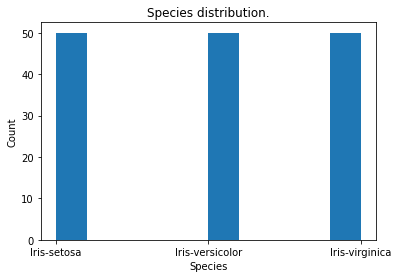

In [10]:
plt.hist(df['Species'])
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Species distribution.')

#all the species are equally distibute equally.

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

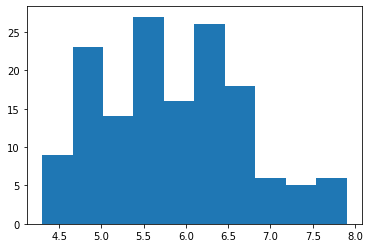

In [11]:
plt.hist(df['SepalLengthCm'])


Text(0.5, 1.0, 'Comparison among the species lenght')

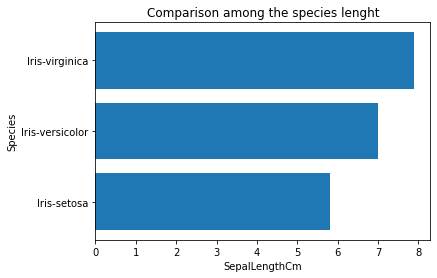

In [12]:
plt.figure(figsize=(6,4))
plt.barh(df['Species'], df['SepalLengthCm'])
plt.xlabel('SepalLengthCm')
plt.ylabel('Species')
plt.title("Comparison among the species lenght")

Text(0.5, 1.0, 'Comparison among the species Petal lenght')

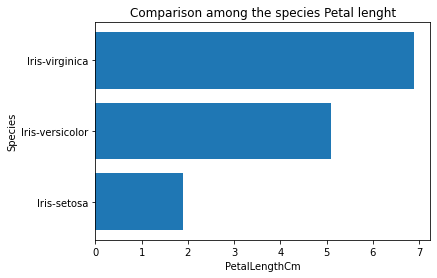

In [13]:
plt.figure(figsize=(6,4))
plt.barh(df['Species'], df['PetalLengthCm'])
plt.xlabel('PetalLengthCm')
plt.ylabel('Species')
plt.title("Comparison among the species Petal lenght")

Text(0.5, 1.0, 'Comparison among the species Petal width')

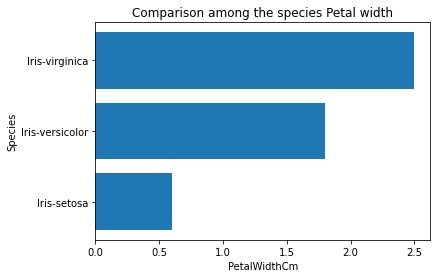

In [14]:
plt.figure(figsize=(6,4))
plt.barh(df['Species'], df['PetalWidthCm'])
plt.xlabel('PetalWidthCm')
plt.ylabel('Species')
plt.title("Comparison among the species Petal width")

Text(0.5, 1.0, 'Comparison among the species sepal width')

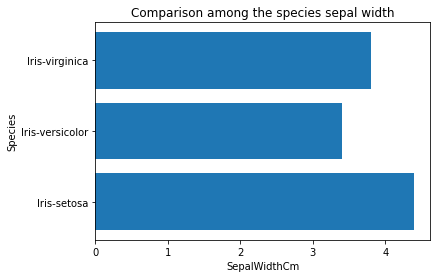

In [15]:
plt.figure(figsize=(6,4))
plt.barh(df['Species'], df['SepalWidthCm'])
plt.xlabel('SepalWidthCm')
plt.ylabel('Species')
plt.title("Comparison among the species sepal width")

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
X = df.iloc[:, :-1].values
y = df['Species']

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [19]:
#it is always a good practice to scale the features so that all of them can be uniformly evaluated
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
# MODEL EVALUATION
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

1.0


In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
import numpy as np

In [26]:
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

Text(0, 0.5, 'Mean Error')

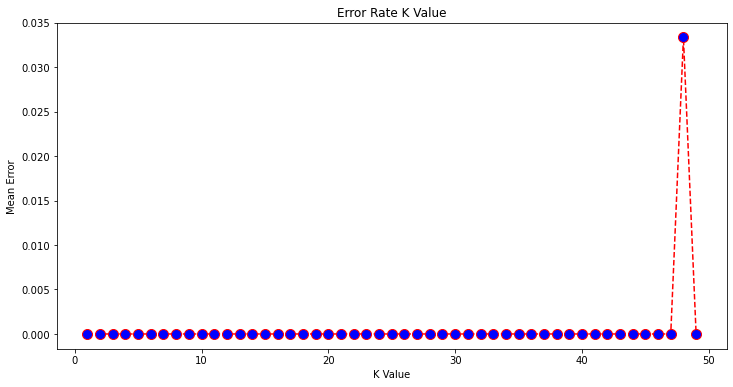

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,50), error_rate, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

From the output we can see that the mean error is zero when the value of the K is between 1 and 48

# MODEL PERFORMANCE USING CROSS-VALIDATION

In [28]:
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [29]:
round(knn_cv.best_score_,2)*100

88.0

In [30]:
knn_cv.best_params_

{'n_neighbors': 2}

The algorithm works best with 2 neighbors giving accuracy of 88%

# Simple SVM

In [31]:
from sklearn.svm import SVC

In [32]:
X_trainsvc,X_testsvc,y_trainsvc,y_testsvc = train_test_split(X,y,test_size=0.2)

In [33]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_trainsvc, y_trainsvc)

SVC(kernel='linear')

In [34]:
y_pred1 = svclassifier.predict(X_testsvc)

In [35]:
cf_1 = print(confusion_matrix(y_testsvc, y_pred1))

print(classification_report(y_testsvc, y_pred1))

[[13  0  0]
 [ 0  7  0]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00         7
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [36]:
cf_1 = print(confusion_matrix(y_testsvc, y_pred1))

[[13  0  0]
 [ 0  7  0]
 [ 0  0 10]]


Text(0, 0.5, 'Mean Error')

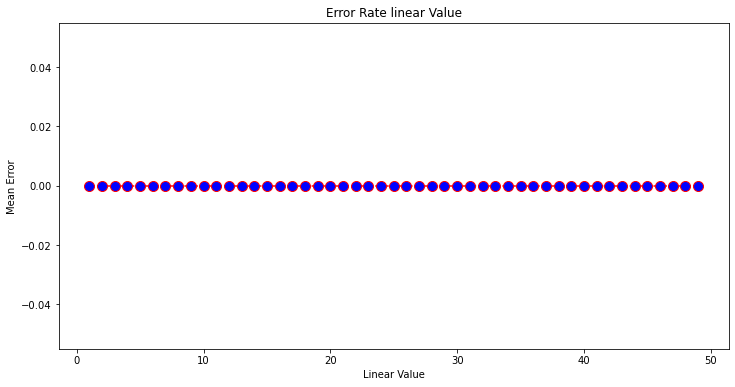

In [37]:
error_rate = []

for i in range(1,50):
    svc = SVC(kernel='linear')
    svc.fit(X_trainsvc, y_trainsvc)
    pred = svc.predict(X_testsvc)
    error_rate.append(np.mean(pred != y_testsvc))
plt.figure(figsize=(12, 6))
plt.plot(range(1,50), error_rate, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate linear Value')
plt.xlabel('Linear Value')
plt.ylabel('Mean Error')

In [38]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [39]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................ C=0.1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] .................. C=0.1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] .

[CV] .................... C=10, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV] .................... C=10, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV] .................... C=10, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV] .................... C=10, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV] .................... C=10, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] .

[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=100, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=100, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.9s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [40]:
print(grid.best_estimator_)

SVC(C=1, gamma=1, kernel='poly')


In [41]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [42]:
import seaborn as sns

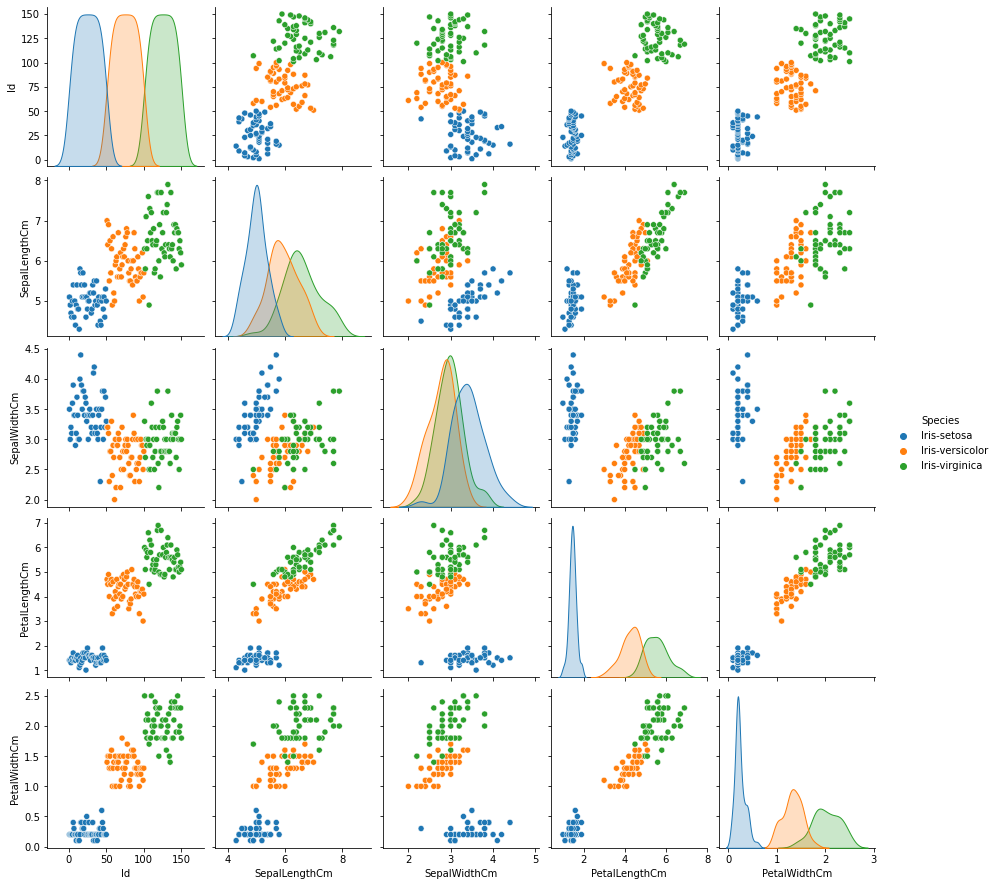

In [43]:
sns.pairplot(df, hue= 'Species')

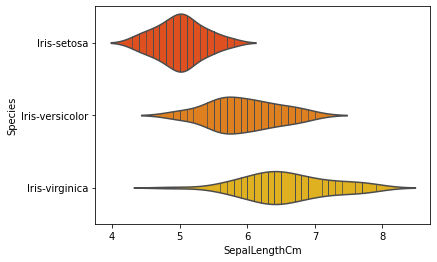

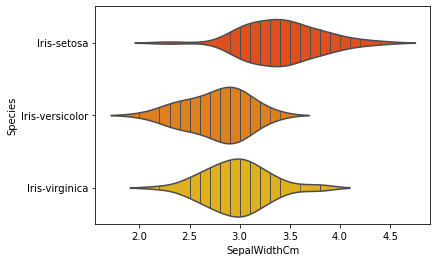

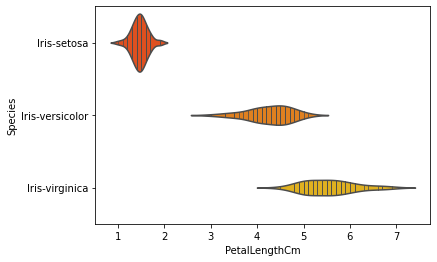

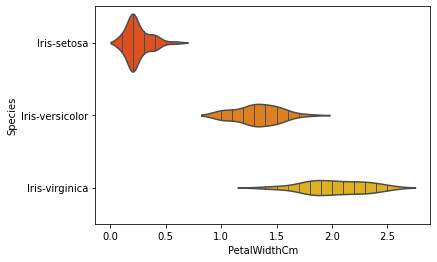

In [44]:
sns.violinplot(x='SepalLengthCm', y='Species', data=df, inner='stick', palette='autumn')
plt.show()
sns.violinplot(x='SepalWidthCm', y='Species', data=df, inner='stick', palette='autumn')
plt.show()
sns.violinplot(x='PetalLengthCm', y='Species', data=df, inner='stick', palette='autumn')
plt.show()
sns.violinplot(x='PetalWidthCm', y='Species', data=df, inner='stick', palette='autumn')
plt.show()

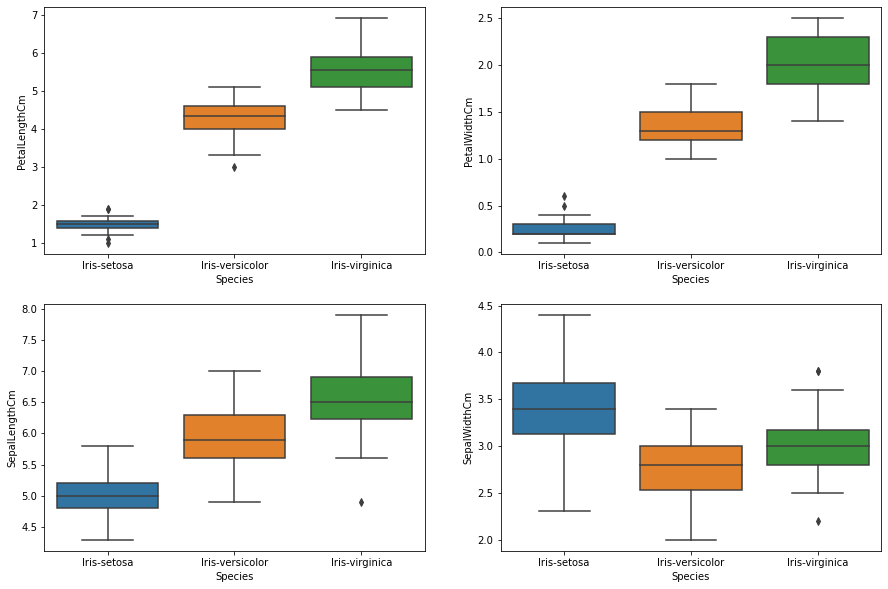

In [46]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='SepalWidthCm',data=df)
plt.show()

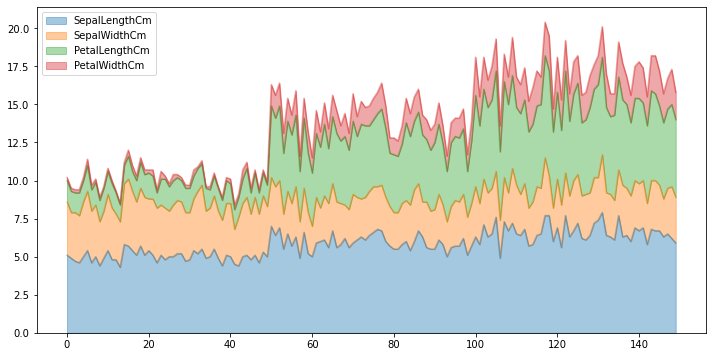

In [48]:
df.plot.area(y=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],alpha=0.4,figsize=(12, 6));

In [49]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


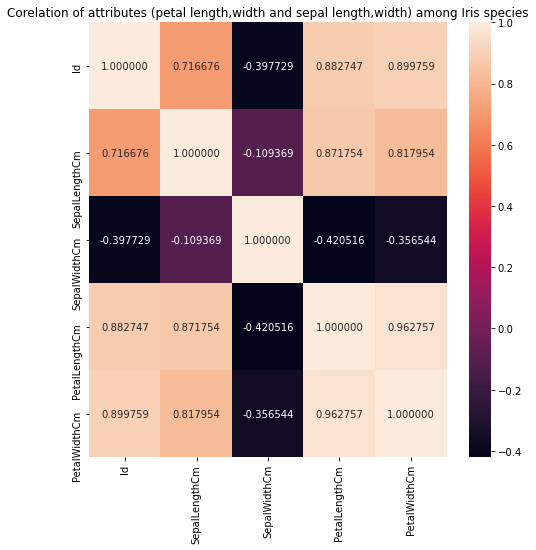

In [50]:
plt.subplots(figsize = (8,8))
sns.heatmap(df.corr(),annot=True,fmt="f").set_title("Corelation of attributes (petal length,width and sepal length,width) among Iris species")
plt.show()

#Observation

The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest

In [52]:
#Train and Test split
X_traina,X_testa,y_traina,y_testa=train_test_split(X,y,test_size=0.3,random_state=0)

In [53]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_traina, y_traina)

RandomForestClassifier()

In [54]:
y_preda = random_forest.predict(X_testa)

In [55]:
print(confusion_matrix(y_testa, y_preda))

print(classification_report(y_testa, y_preda))

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [56]:
from sklearn.naive_bayes import GaussianNB

In [57]:
gaussian = GaussianNB()
gaussian.fit(X_traina, y_traina)
Y_preda = gaussian.predict(X_testa)

In [58]:
accuracy_nb=round(accuracy_score(y_testa,Y_preda)* 100, 2)
acc_gaussian = round(gaussian.score(X_traina, y_traina) * 100, 2)

In [60]:
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

In [61]:
cm = confusion_matrix(y_testa, Y_preda)
accuracy = accuracy_score(y_testa,Y_preda)
precision =precision_score(y_testa, Y_preda,average='micro')
recall =  recall_score(y_testa, Y_preda,average='micro')
f1 = f1_score(y_testa,Y_preda,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000


In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_traina, y_traina)  
Y_preda = decision_tree.predict(X_testa) 
accuracy_dt=round(accuracy_score(y_testa,Y_preda)* 100, 2)
acc_decision_tree = round(decision_tree.score(X_traina, y_traina) * 100, 2)

cm = confusion_matrix(y_testa, Y_preda)
accuracy = accuracy_score(y_testa,Y_preda)
precision =precision_score(y_testa, Y_preda,average='micro')
recall =  recall_score(y_testa, Y_preda,average='micro')
f1 = f1_score(y_testa,Y_preda,average='micro')
print('Confusion matrix for DecisionTree\n',cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)

Confusion matrix for DecisionTree
 [[16  0  0]
 [ 0 18  0]
 [ 0  1 10]]
accuracy_DecisionTree: 0.978
precision_DecisionTree: 0.978
recall_DecisionTree: 0.978
f1-score_DecisionTree : 0.978


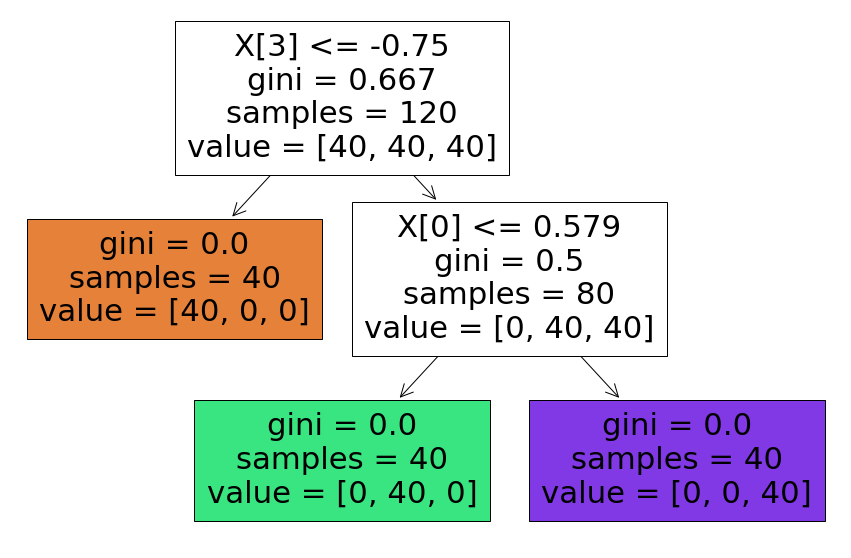

In [64]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15,10))
plot_tree(decision_tree.fit(X_train, y_train)  ,filled=True)
plt.show()